In [ ]:
# Merge different method in all years into one table
from .DataProcess.mergeData import mergeData
mergeData("China_Acc_Results")

In [1]:
# Get data for analysis
import os
import pandas as pd
import geopandas as gpd
import numpy as np
BASE_MAP = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="CNMap_City", encoding="utf-8")
RESULT = pd.read_csv(os.path.join("China_Acc_Results", "Result", "city_efficiency.csv"), encoding="utf-8")
RESULT = RESULT[RESULT["name"] != u"境界线"]

# Clean Gini Nan
for y in range(2015, 2026):
    RESULT.loc[RESULT["Relative_Accessibility_{}".format(y)].isna(), "M2SFCA_Gini_{}".format(y)] = np.nan

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


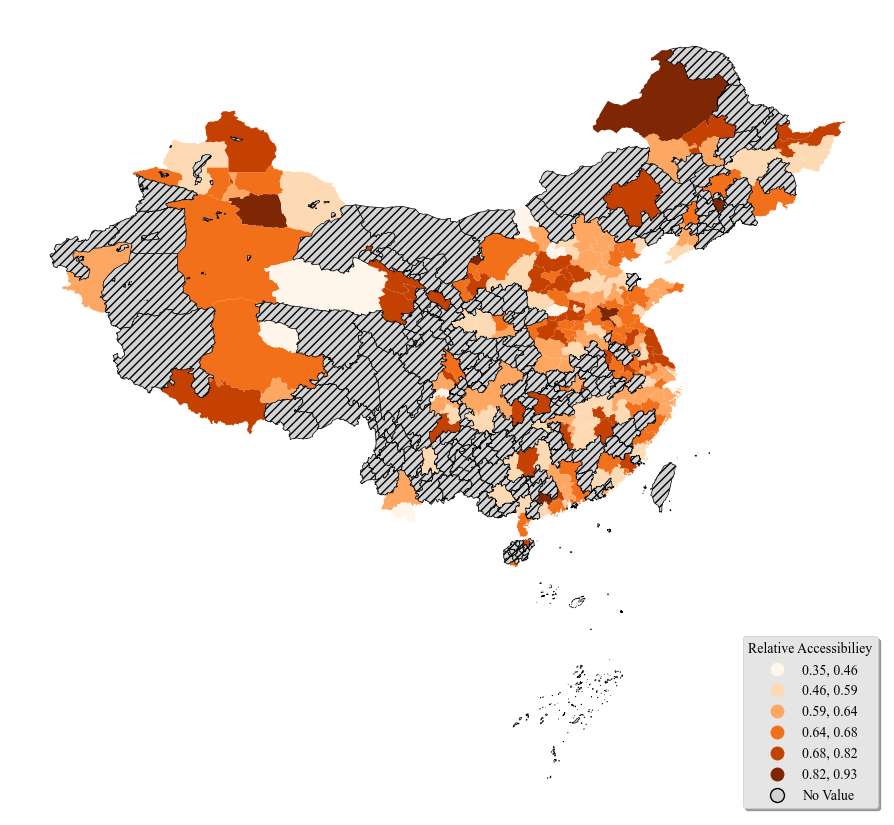

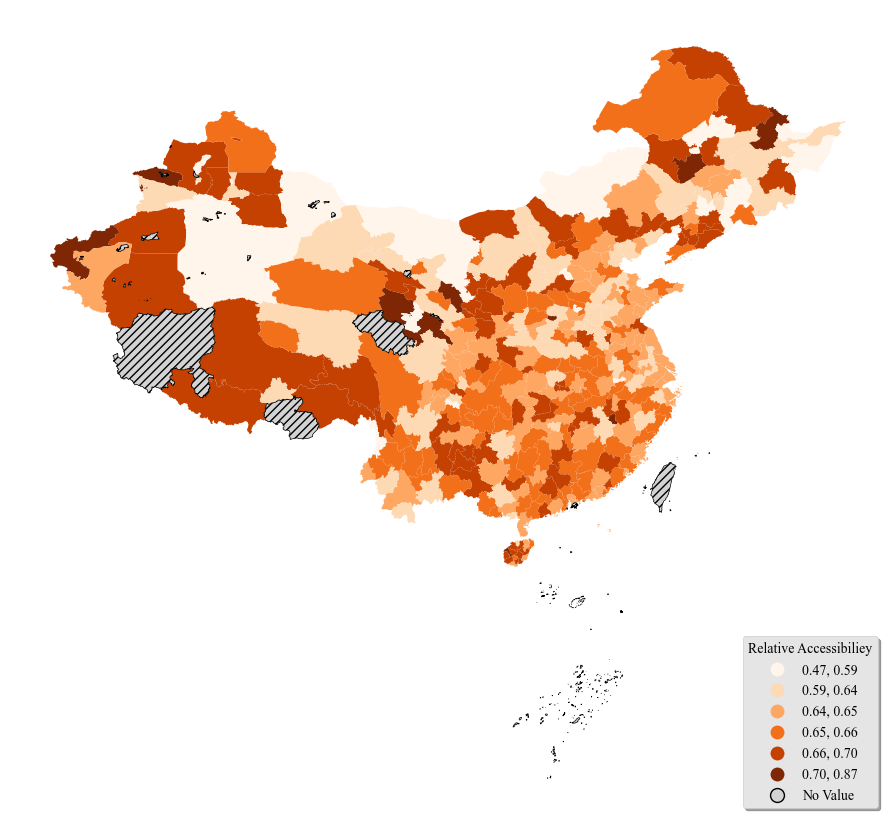

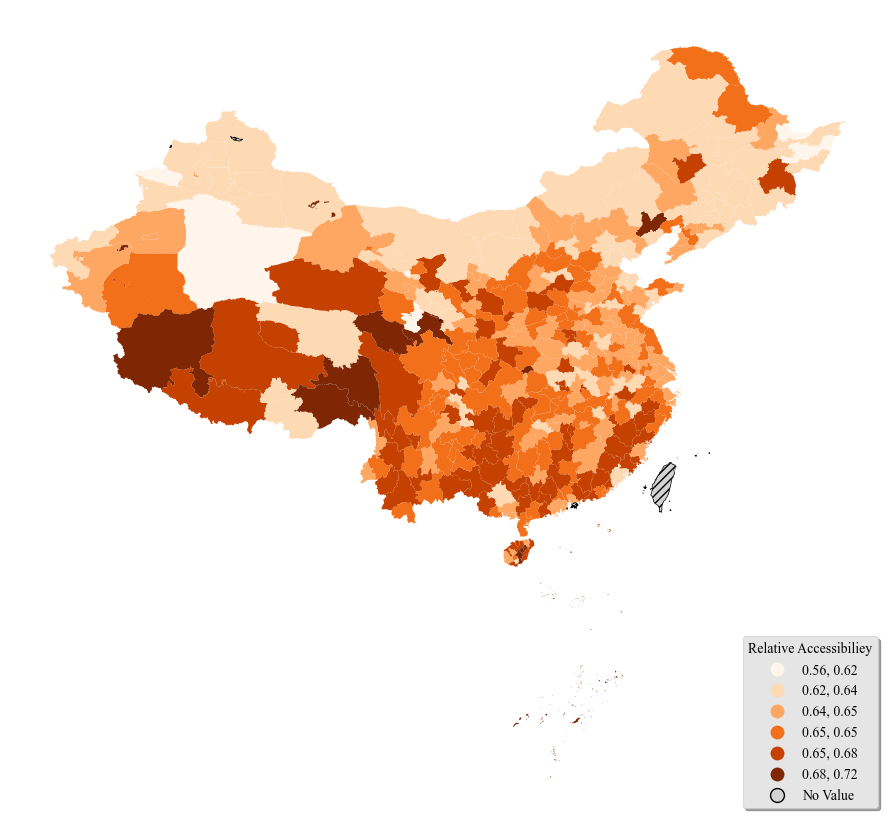

In [2]:
# Print
from DataProcess.drawBasicMap import draw152535
draw152535(RESULT.copy(), BASE_MAP)

efficiency

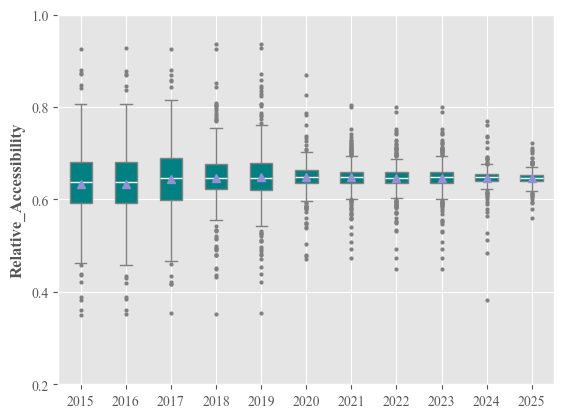

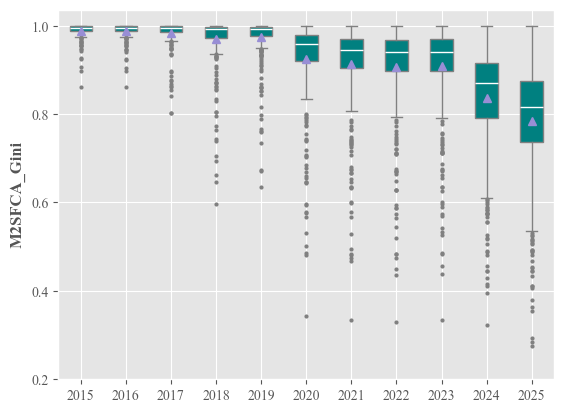

In [ ]:
# Boxplot of efficiency
from DataProcess.boxPlot import boxPlot
boxPlot(RESULT.copy(), "Relative_Accessibility")
boxPlot(RESULT.copy(), "M2SFCA_Gini")

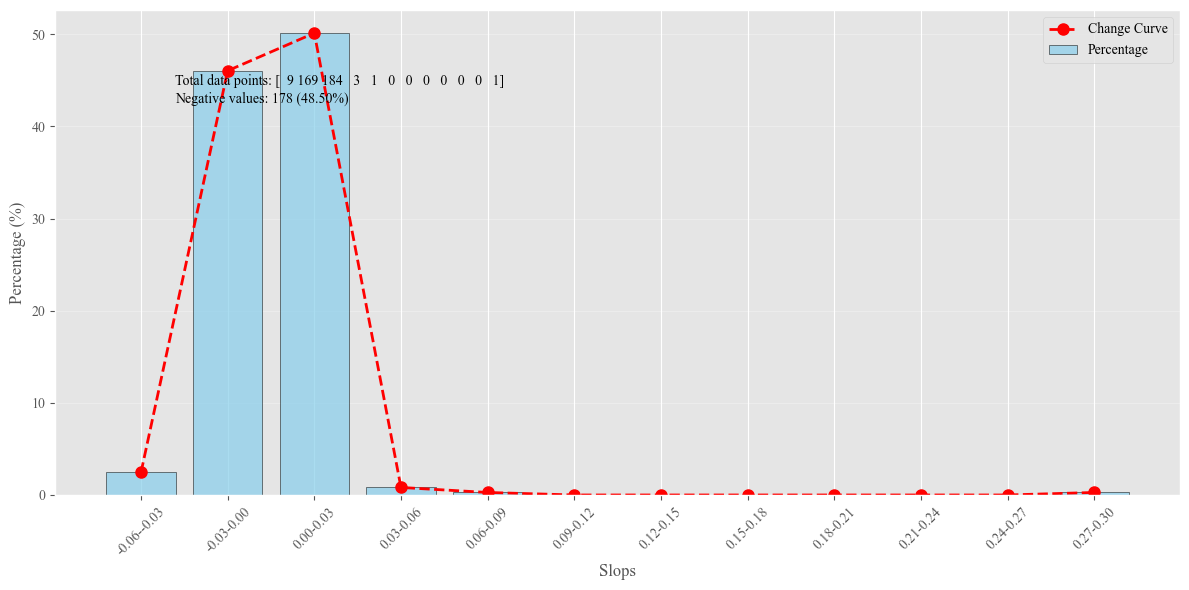

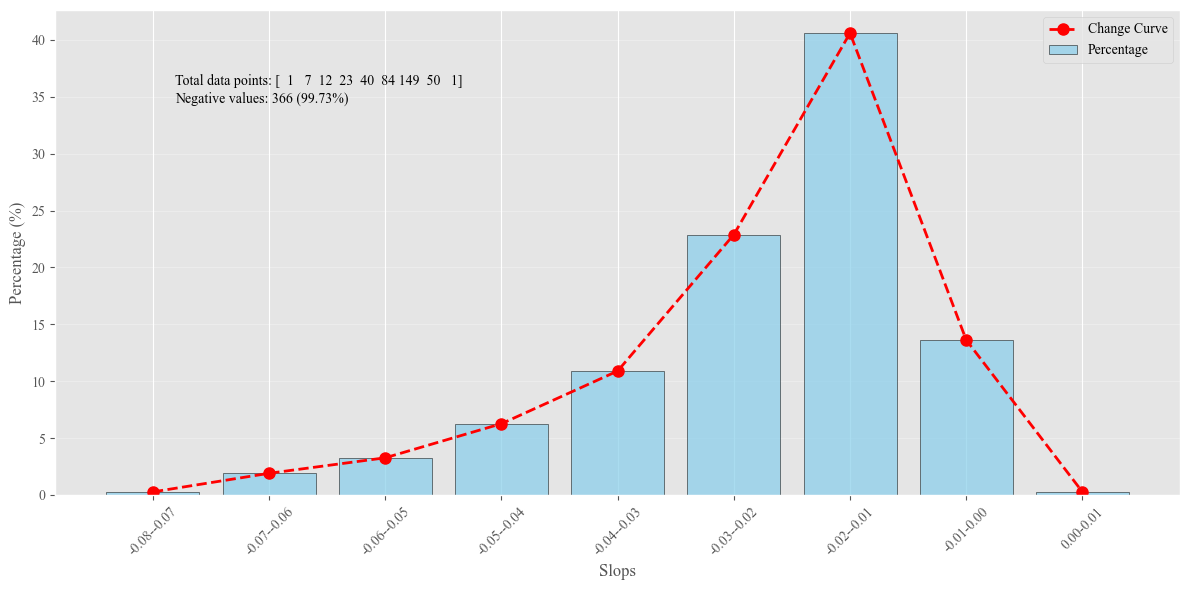

In [2]:
# Proportional distribution with different levels of improvement in efficiency from 2015 to 2025
from DataProcess.improvement import improvement
improvement(RESULT.copy(), "Relative_Accessibility")
improvement(RESULT.copy(), "M2SFCA_Gini")

In [3]:
# Cities in China lacking any charging efficiency throughout the entire decade
for y in range(2015, 2026):
    a = set(RESULT[RESULT["Relative_Accessibility_{}".format(y)].isna()]["name"].to_list())
    a = a & a
    print(a)

{'甘南藏族自治州', '白杨市', '信阳市', '遂宁市', '东营市', '安顺市', '临夏回族自治州', '凉山彝族自治州', '运城市', '德宏傣族景颇族自治州', '黄石市', '贺州市', '昌都市', '莆田市', '绥化市', '河池市', '河源市', '太子山天然林保护区', '乐东黎族自治县', '黔西南布依族苗族自治州', '酒泉市', '山南市', '铜仁市', '肇庆市', '汉中市', '锡林郭勒盟', '果洛藏族自治州', '贵阳市', '和田地区', '临沧市', '滁州市', '葫芦岛市', '昆玉市', '黑河市', '荆门市', '新星市', '荆州市', '文昌市', '昌江黎族自治县', '三明市', '伊春市', '来宾市', '防城港市', '黄南藏族自治州', '红河哈尼族彝族自治州', '辽阳市', '克拉玛依市', '南平市', '庆阳市', '玉溪市', '乌海市', '玉树藏族自治州', '巴彦淖尔市', '岳阳市', '怀化市', '万宁市', '张掖市', '衡阳市', '邵阳市', '克孜勒苏柯尔克孜自治州', '揭阳市', '固原市', '咸宁市', '淮北市', '临高县', '大兴安岭地区', '阿拉善盟', '延安市', '迪庆藏族自治州', '赣州市', '宜昌市', '梧州市', '神农架林区', '胡杨河市', '朝阳市', '巴中市', '图木舒克市', '池州市', '金昌市', '孝感市', '南充市', '五指山市', '铁门关市', '丽水市', '铜川市', '曲靖市', '怒江傈僳族自治州', '黄冈市', '澄迈县', '十堰市', '宣城市', '阿坝藏族羌族自治州', '牡丹江市', '伊犁哈萨克自治州', '陇南市', '北屯市', '广安市', '琼中黎族苗族自治县', '通辽市', '阿克苏地区', '阿里地区', '钦州市', '大理白族自治州', '保山市', '茂名市', '屯昌县', '盘锦市', '通化市', '六盘水市', '天门市', '达州市', '琼海市', '百色市', '内江市', '崇左市', '白城市', '定安县', '阜阳市', '毕节市', '抚顺市', '楚雄彝族自治州', '吉林市', '文山壮族苗族自治州', '可克达拉

In [5]:
# Clusting analysis
from DataProcess.clusting import clusting
a = clusting(RESULT.copy(), BASE_MAP.copy())

In [5]:
a.calMoranI("Relative_Accessibility", 0.5)
a.calMoranI("Gini_efficiency", 0.5)


Relative_Accessibility do not have sptial correaltion.
Gini_efficiency do not have sptial correaltion.


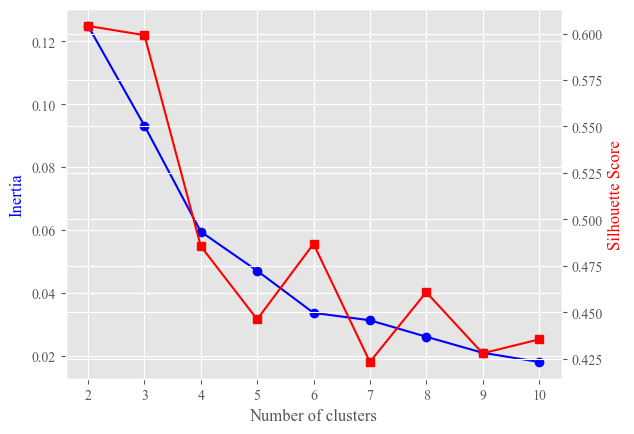

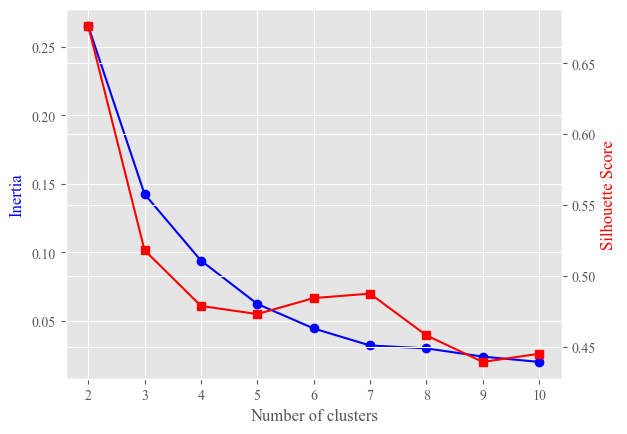

In [6]:
a.showK("Relative_Accessibility")
a.showK("M2SFCA_Gini")

Cluster 0: ['鄂州市', '广安市', '濮阳市', '宣城市', '六盘水市', '深圳市', '三明市', '景德镇市', '楚雄彝族自治州', '大连市', '攀枝花市', '贺州市', '西安市', '淮北市', '石家庄市', '汕尾市', '荆门市', '衢州市', '迪庆藏族自治州', '葫芦岛市', '济南市', '贵阳市', '珠海市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '泉州市', '自贡市', '临沂市', '百色市', '鞍山市', '唐山市', '岳阳市', '河源市', '孝感市', '金华市', '兴安盟', '雅安市', '亳州市', '商洛市', '盐城市', '汕头市', '安顺市', '黔南布依族苗族自治州', '厦门市', '阿克苏地区', '红河哈尼族彝族自治州', '太原市', '常德市', '牡丹江市', '淮南市', '威海市', '绍兴市', '池州市', '淮安市', '黔东南苗族侗族自治州', '莆田市', '南昌市', '佛山市', '昆明市', '张家界市', '泸州市', '沈阳市', '邯郸市', '马鞍山市', '三亚市', '十堰市', '呼和浩特市', '德宏傣族景颇族自治州', '枣庄市', '安阳市', '阳泉市', '保亭黎族苗族自治县', '鹰潭市', '乐东黎族自治县', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '镇江市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '澄迈县', '长沙市', '屯昌县', '定安县', '海口市', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '锡林郭勒盟', '琼中黎族苗族自治县', '长治市', '通化市', '上海市', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '驻马店市', '哈密市', '锦州市', '肇庆市', '恩施土家族苗族自治州', '宜昌市', '平凉市', '青岛市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '广州市', '吉林市', '九江市', '来宾市', '张家口市', '德州市', '抚顺市',

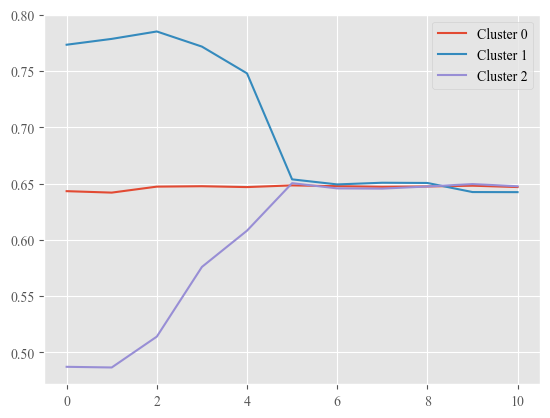

Cluster 0: ['梅州市', '鄂州市', '吕梁市', '舟山市', '朝阳市', '广安市', '濮阳市', '宣城市', '六盘水市', '三明市', '景德镇市', '楚雄彝族自治州', '攀枝花市', '贺州市', '邵阳市', '石家庄市', '荆门市', '衢州市', '迪庆藏族自治州', '宜宾市', '葫芦岛市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '自贡市', '临沂市', '百色市', '鞍山市', '铜陵市', '唐山市', '岳阳市', '河源市', '孝感市', '兴安盟', '盘锦市', '雅安市', '亳州市', '商洛市', '盐城市', '安顺市', '黔南布依族苗族自治州', '阿克苏地区', '红河哈尼族彝族自治州', '甘南藏族自治州', '常德市', '牡丹江市', '淮南市', '德阳市', '威海市', '秦皇岛市', '阳江市', '铁岭市', '达州市', '池州市', '淮安市', '遵义市', '黔东南苗族侗族自治州', '莆田市', '大同市', '张家界市', '泸州市', '邯郸市', '马鞍山市', '日照市', '德宏傣族景颇族自治州', '梧州市', '枣庄市', '安阳市', '怀化市', '阳泉市', '保亭黎族苗族自治县', '中农发山丹马场', '鹰潭市', '博尔塔拉蒙古自治州', '乐东黎族自治县', '辽源市', '齐齐哈尔市', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '镇江市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '吐鲁番市', '澄迈县', '屯昌县', '定安县', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '娄底市', '长治市', '赣州市', '通化市', '巴音郭楞蒙古自治州', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '黑河市', '扬州市', '驻马店市', '株洲市', '锦州市', '恩施土家族苗族自治州', '怒江傈僳族自治州', '平凉市', '眉山市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '吉林市', '九江市', '漳

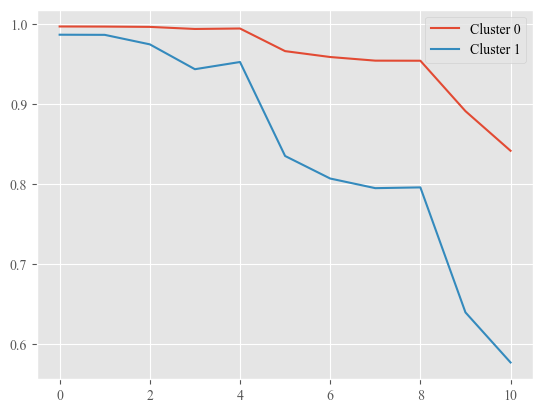

In [7]:
reativeClustering = a.clusting("Relative_Accessibility", 3)
giniClustering = a.clusting("M2SFCA_Gini", 2)

In [9]:
5/(216+67+27+6+38+5)

0.013927576601671309

Stable efficiency & Slowly increased equlity (215): {'宿州市', '遂宁市', '东营市', '信阳市', '安顺市', '泰州市', '临夏回族自治州', '许昌市', '凉山彝族自治州', '运城市', '德宏傣族景颇族自治州', '拉萨市', '贺州市', '昌都市', '咸阳市', '莆田市', '菏泽市', '绥化市', '河池市', '河源市', '海南藏族自治州', '乐东黎族自治县', '黔西南布依族苗族自治州', '酒泉市', '山南市', '枣庄市', '邯郸市', '晋中市', '昌吉回族自治州', '随州市', '和田地区', '临沧市', '滁州市', '葫芦岛市', '长治市', '鄂州市', '荆门市', '兴安盟', '延边朝鲜族自治州', '新星市', '中卫市', '滨州市', '荆州市', '文昌市', '昌江黎族自治县', '三明市', '洛阳市', '来宾市', '三门峡市', '黄南藏族自治州', '红河哈尼族彝族自治州', '辽阳市', '南平市', '庆阳市', '玉溪市', '襄阳市', '乌海市', '巴彦淖尔市', '岳阳市', '塔城地区', '平凉市', '万宁市', '张掖市', '衡阳市', '七台河市', '濮阳市', '淮南市', '咸宁市', '临沂市', '临高县', '大兴安岭地区', '马鞍山市', '九江市', '鹰潭市', '上饶市', '迪庆藏族自治州', '唐山市', '威海市', '神农架林区', '巴中市', '聊城市', '衢州市', '台州市', '池州市', '金昌市', '孝感市', '南充市', '镇江市', '连云港市', '宿迁市', '驻马店市', '亳州市', '忻州市', '盐城市', '丽水市', '常德市', '宜春市', '泰安市', '仙桃市', '济源市', '曲靖市', '宝鸡市', '萍乡市', '黄冈市', '商丘市', '阳泉市', '澄迈县', '宣城市', '潍坊市', '牡丹江市', '重庆市', '陇南市', '焦作市', '嘉峪关市', '广安市', '周口市', '日喀则市', '龙岩市', '西宁市', '喀什地区', '通辽市', '张家口市', '阿克苏地区', '阿里地区

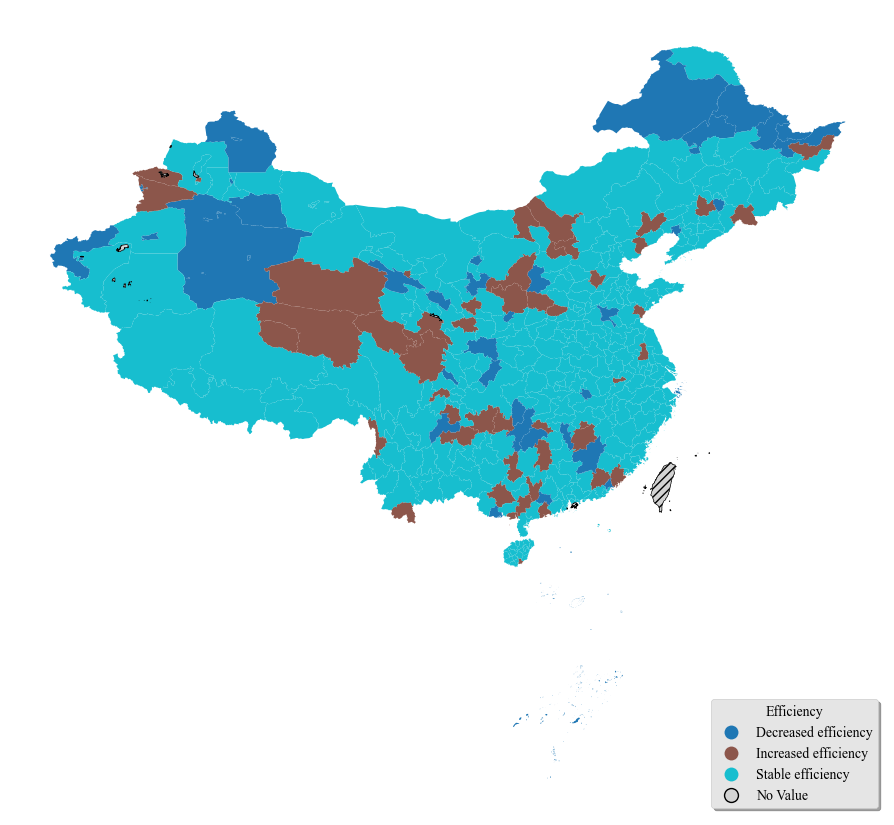

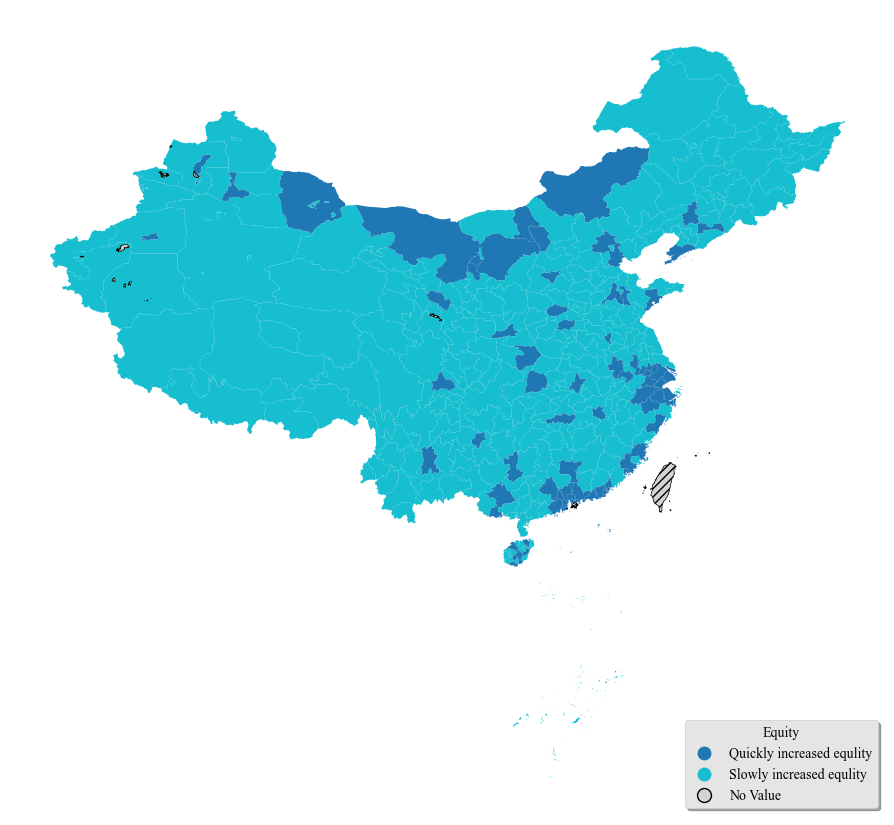

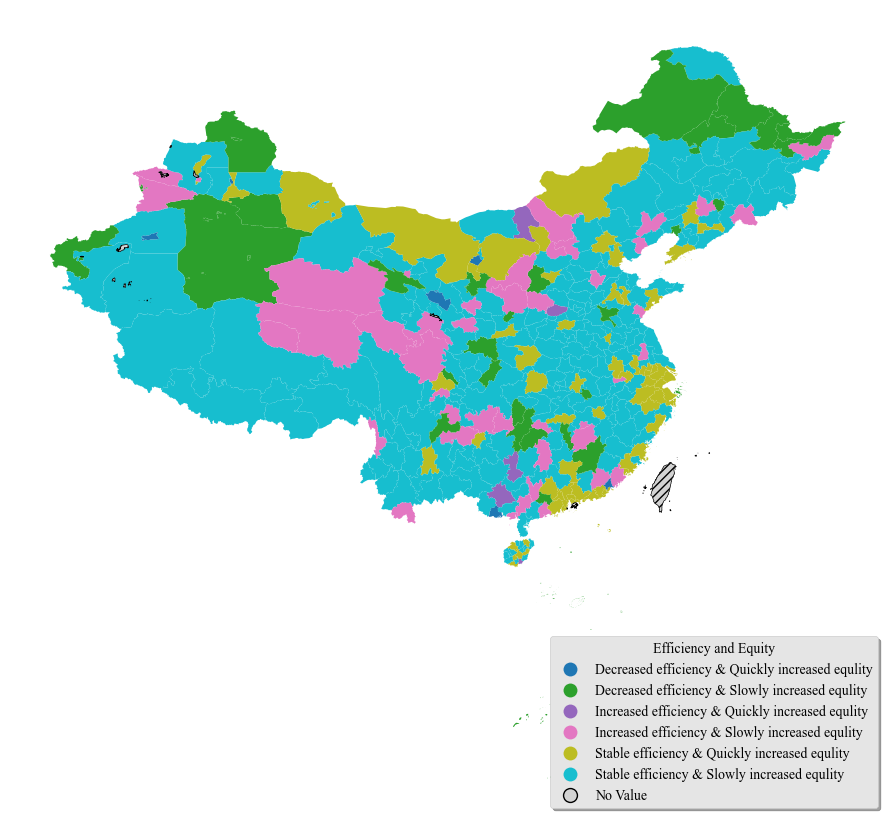

In [8]:
from DataProcess.drawBasicMap import drawClusting
drawClusting(RESULT, BASE_MAP, reativeClustering, giniClustering, "China_Acc_Results\\Result")

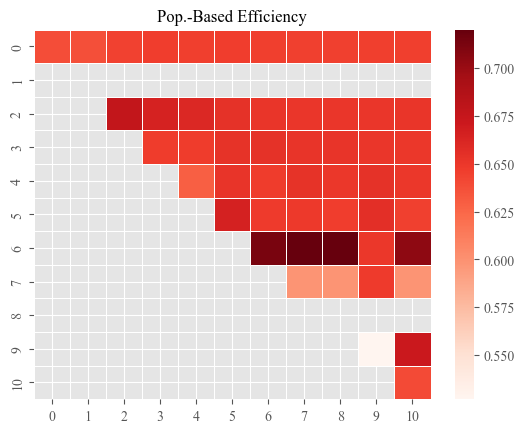

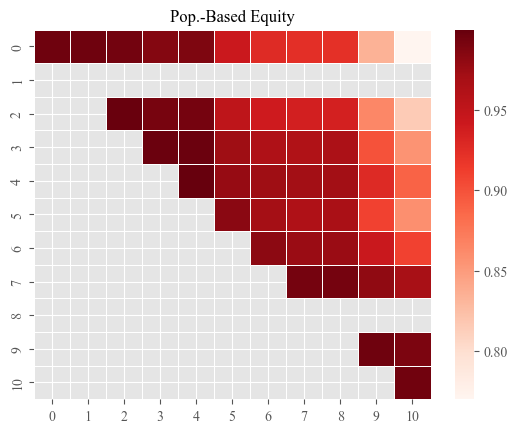

In [9]:
from DataProcess.cohort import cohort
cohort(RESULT.copy(), "Relative_Accessibility")
cohort(RESULT.copy(), "M2SFCA_Gini")


=== Economic index of Quickly increased equlity ===
• Average GDP 8419.40 (Stander Division: 9550.51)
• Average Per Capita GDP 117227.87
• Industrial Structue: Primary Industry 6.82% | Secondary Industru 40.08% | Tertiary Industry 53.10%

=== Economic index of Slowly increased equlity ===
• Average GDP 2163.63 (Stander Division: 2473.80)
• Average Per Capita GDP 66987.81
• Industrial Structue: Primary Industry 15.93% | Secondary Industru 36.51% | Tertiary Industry 47.56%


c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\clustingAnalysis.py:76: RuntimeWarning: divide by zero encountered in log10
  logTicks = np.log10(percentages)


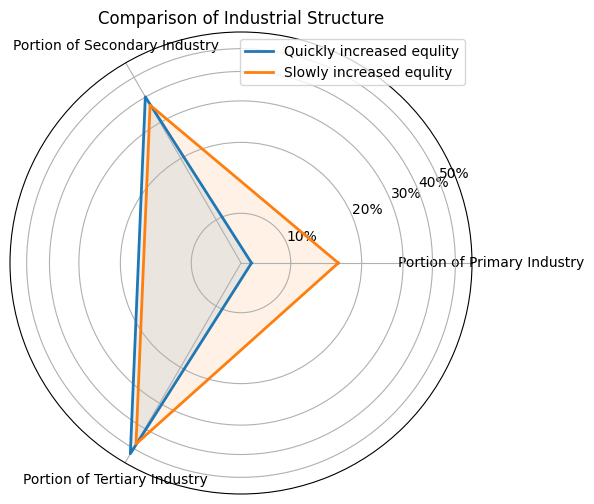

In [2]:
from DataProcess.clustingAnalysis import clustingAnalysis
city = pd.read_csv("China_Acc_Results/Result/city_with_clusting.csv", encoding="utf-8")
gdp = pd.read_excel("China_Acc_Results/Result/city_gdponly.xlsx")
b = clustingAnalysis(city, gdp).analysisEquity()
b.analysis()
b.drawRadar()


=== Economic index of Decreased efficiency ===
• Average GDP 1464.41 (Stander Division: 1296.10)
• Average Per Capita GDP 70301.71
• Industrial Structue: Primary Industry 18.08% | Secondary Industru 37.07% | Tertiary Industry 44.85%

=== Economic index of Increased efficiency ===
• Average GDP 2036.08 (Stander Division: 1748.88)
• Average Per Capita GDP 70474.37
• Industrial Structue: Primary Industry 15.62% | Secondary Industru 37.25% | Tertiary Industry 47.13%

=== Economic index of Stable efficiency ===
• Average GDP 3961.55 (Stander Division: 6092.86)
• Average Per Capita GDP 79467.01
• Industrial Structue: Primary Industry 13.23% | Secondary Industru 37.27% | Tertiary Industry 49.49%


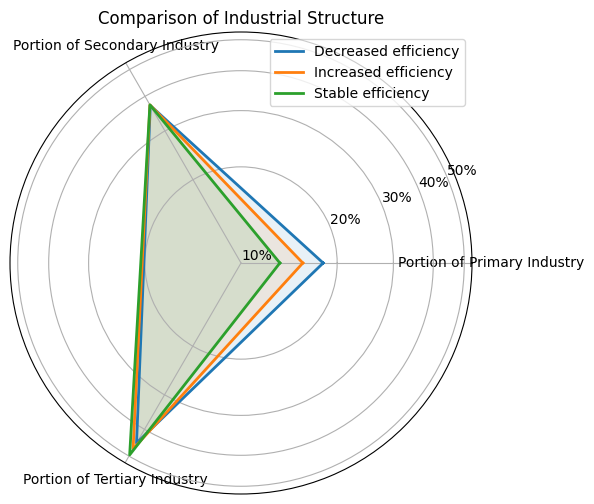

In [3]:
b = clustingAnalysis(city, gdp).analysisEfficiency()
b.analysis()
b.drawRadar()


=== Economic index of Decreased efficiency & Quickly increased equlity ===
• Average GDP 1238.28 (Stander Division: 1159.73)
• Average Per Capita GDP 94656.83
• Industrial Structue: Primary Industry 15.83% | Secondary Industru 42.87% | Tertiary Industry 41.30%

=== Economic index of Decreased efficiency & Slowly increased equlity ===
• Average GDP 1506.81 (Stander Division: 1332.79)
• Average Per Capita GDP 65735.12
• Industrial Structue: Primary Industry 18.51% | Secondary Industru 35.98% | Tertiary Industry 45.51%

=== Economic index of Increased efficiency & Quickly increased equlity ===
• Average GDP 3087.16 (Stander Division: 1978.35)
• Average Per Capita GDP 92971.80
• Industrial Structue: Primary Industry 11.44% | Secondary Industru 38.79% | Tertiary Industry 49.75%

=== Economic index of Increased efficiency & Slowly increased equlity ===
• Average GDP 1907.90 (Stander Division: 1701.35)
• Average Per Capita GDP 67730.78
• Industrial Structue: Primary Industry 16.13% | Seconda

c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\clustingAnalysis.py:76: RuntimeWarning: divide by zero encountered in log10
  logTicks = np.log10(percentages)


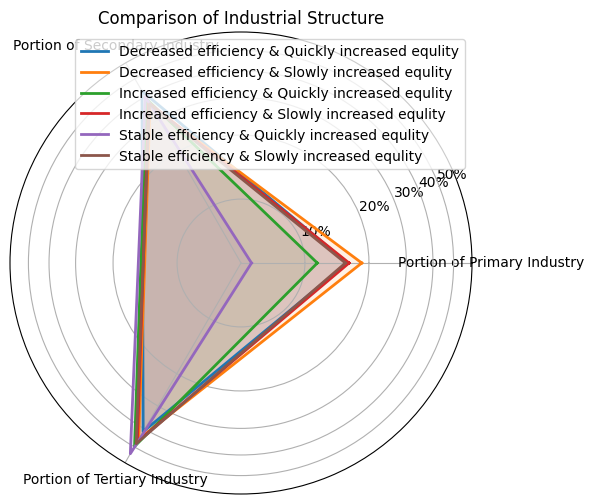

In [4]:
b = clustingAnalysis(city, gdp).analysisAll()
b.analysis()
b.drawRadar()

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 4438.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 4438, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


无锡市:2015


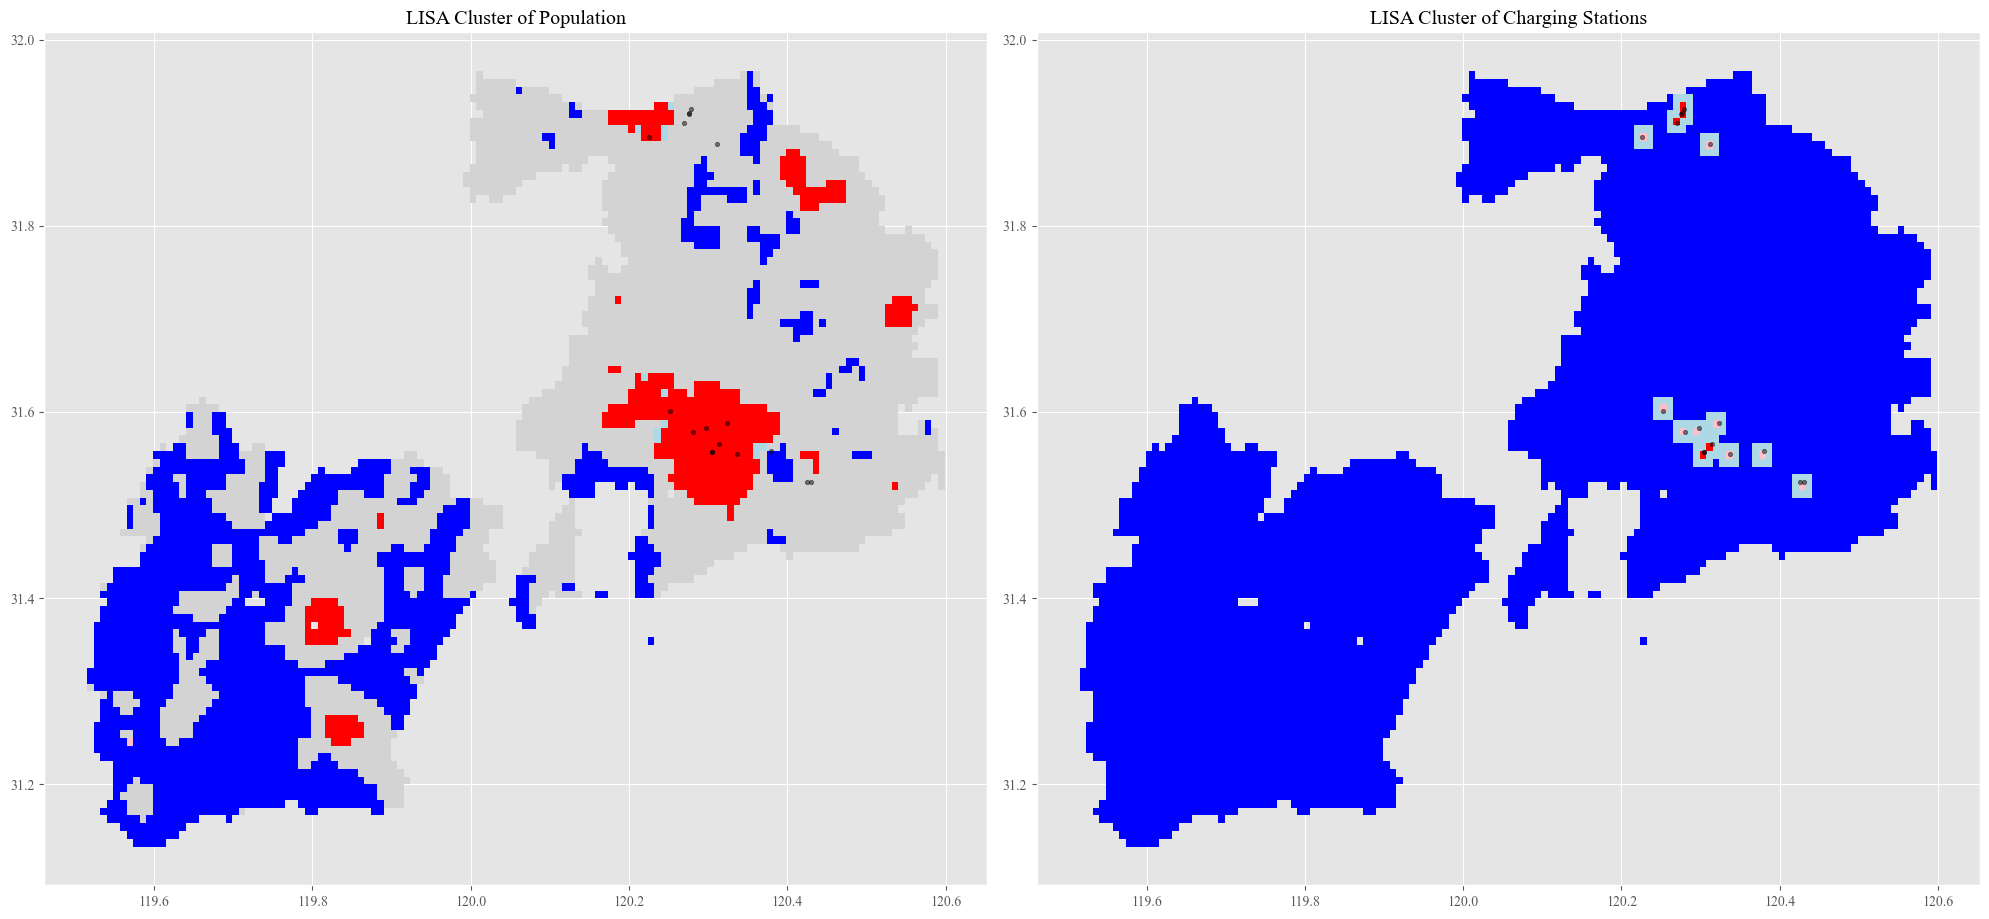

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 4438.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


('WARNING: ', 4438, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


无锡市:2018


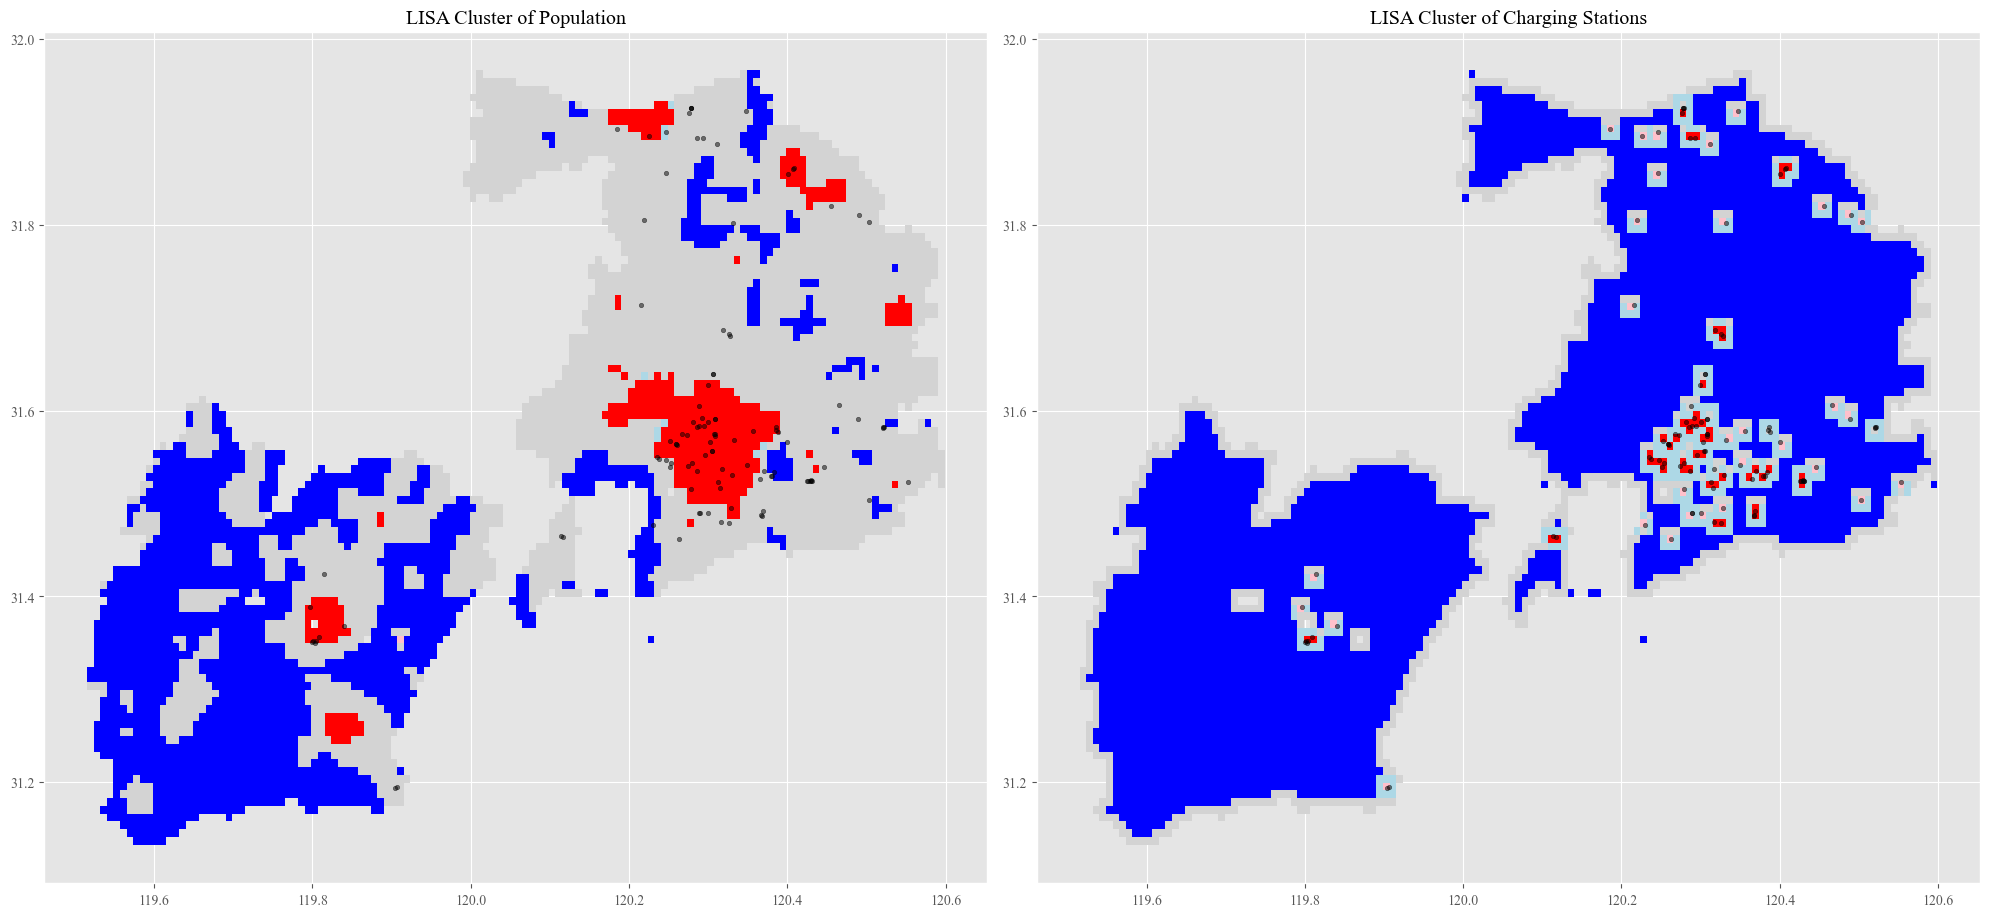

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 4438.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


('WARNING: ', 4438, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


无锡市:2020


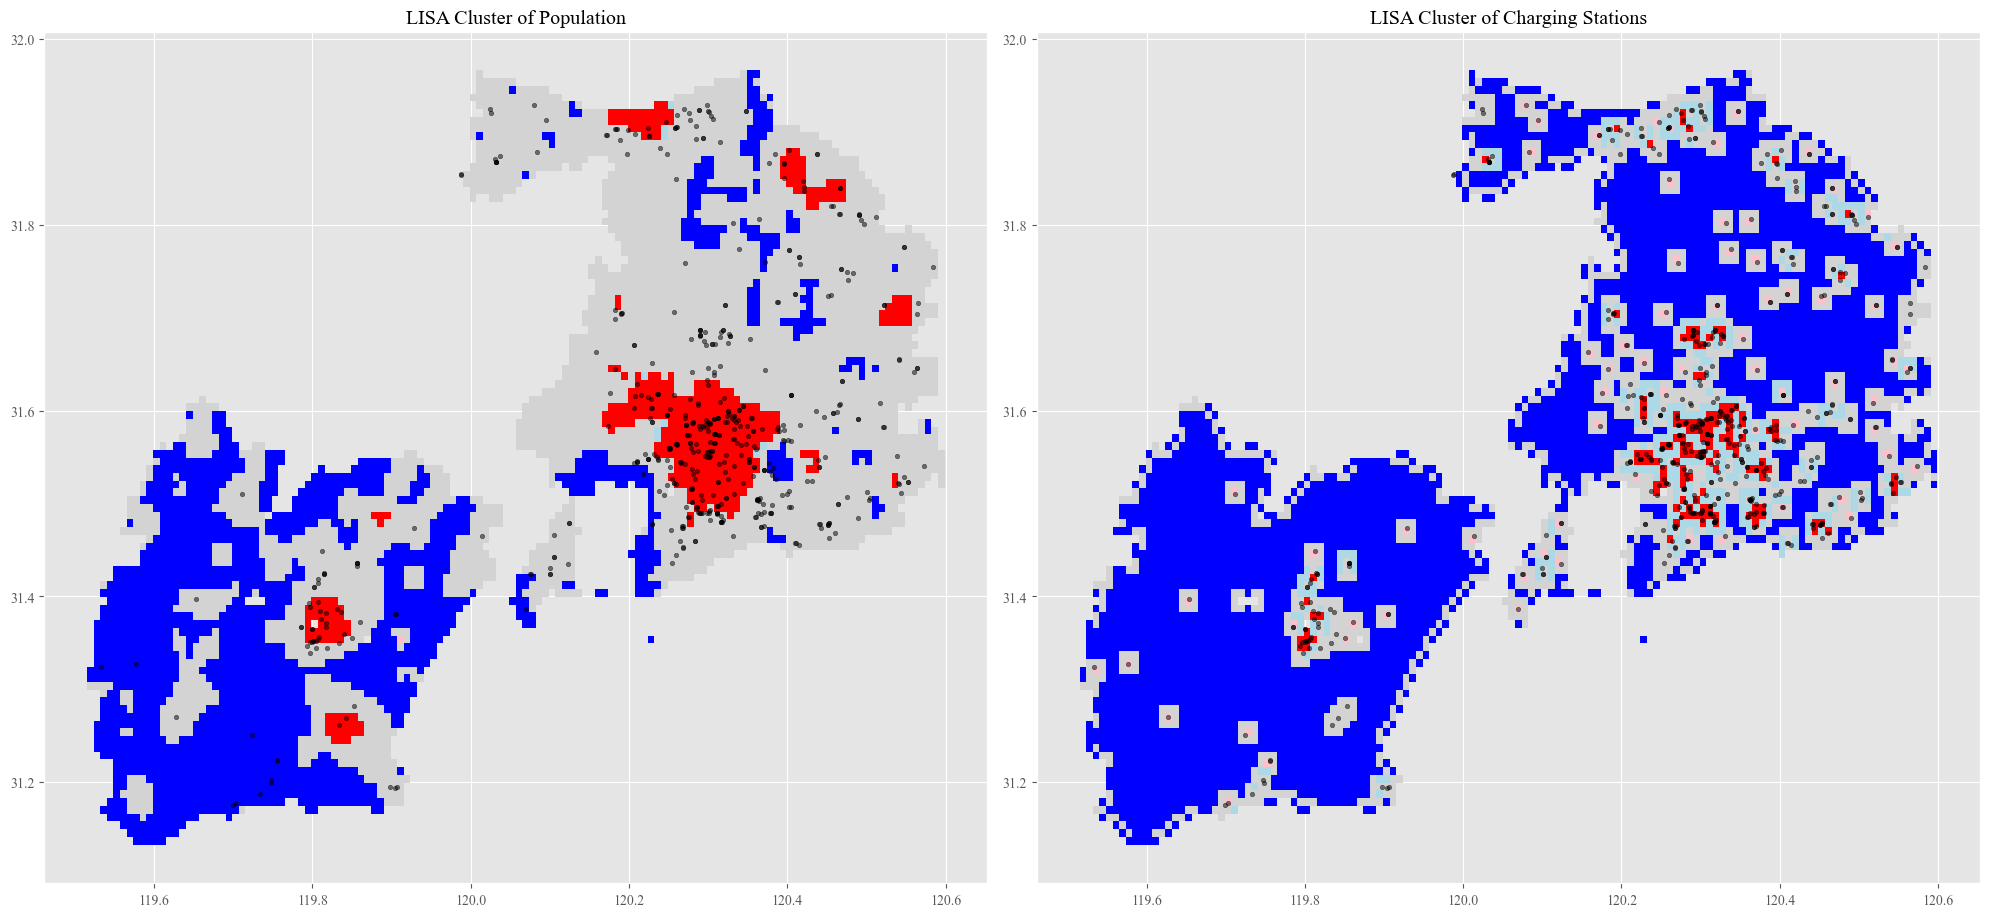

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 7709.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 7709, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


南京市:2015


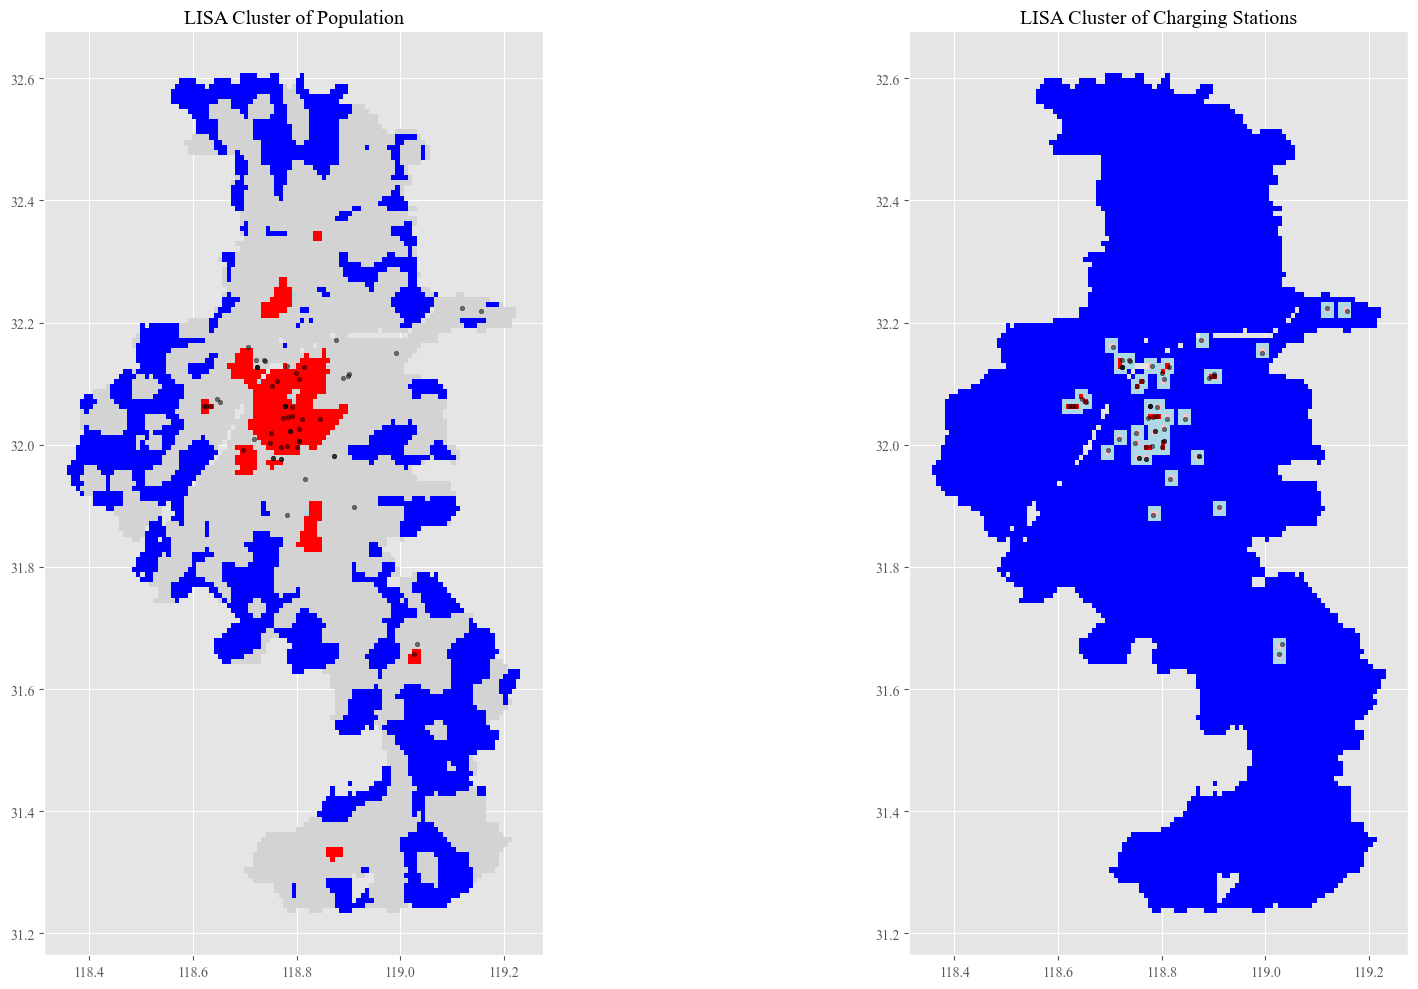

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 7709.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 7709, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


南京市:2018


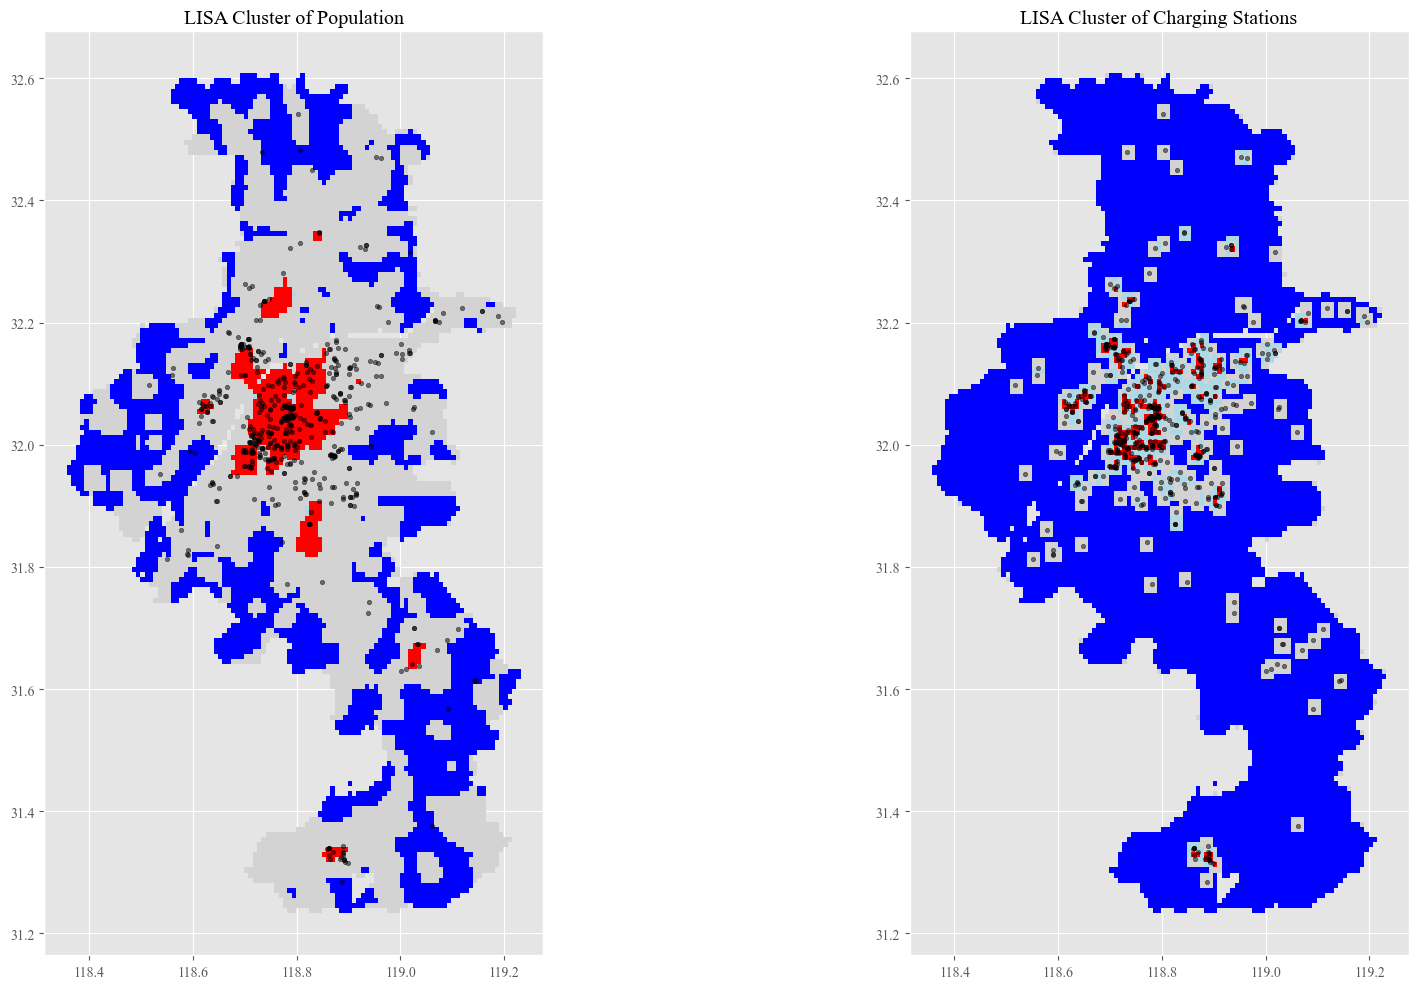

C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 7709.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 7709, ' is an island (no neighbors)')


C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\tengd\AppData\Roaming\Python\Python313\site-packages\esda\moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


南京市:2020


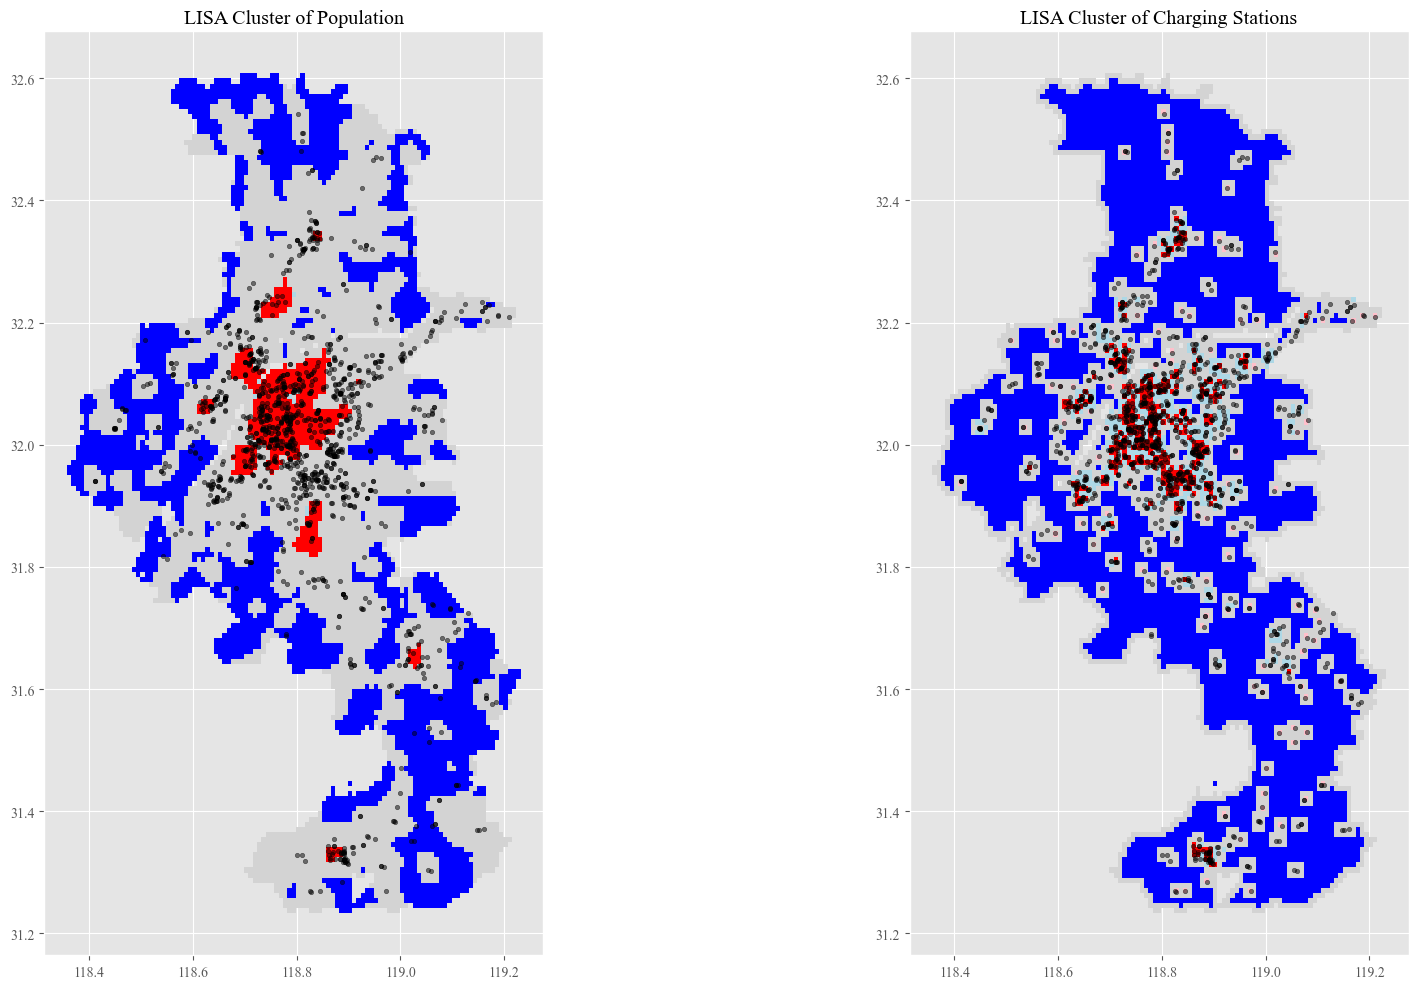

天津市:2015


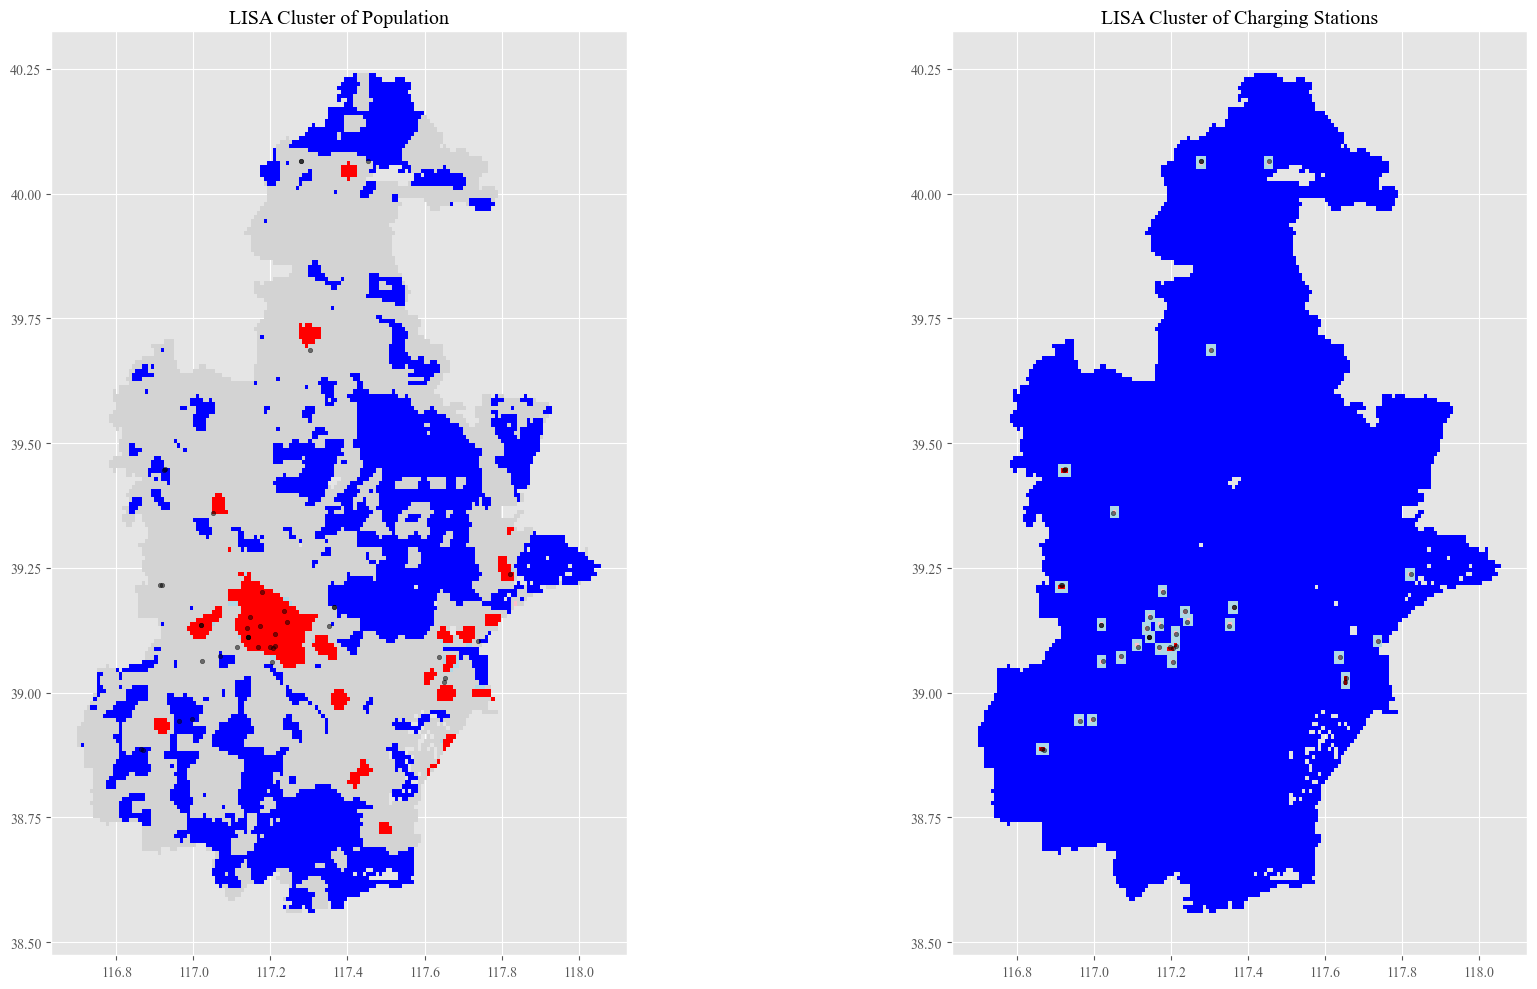

天津市:2018


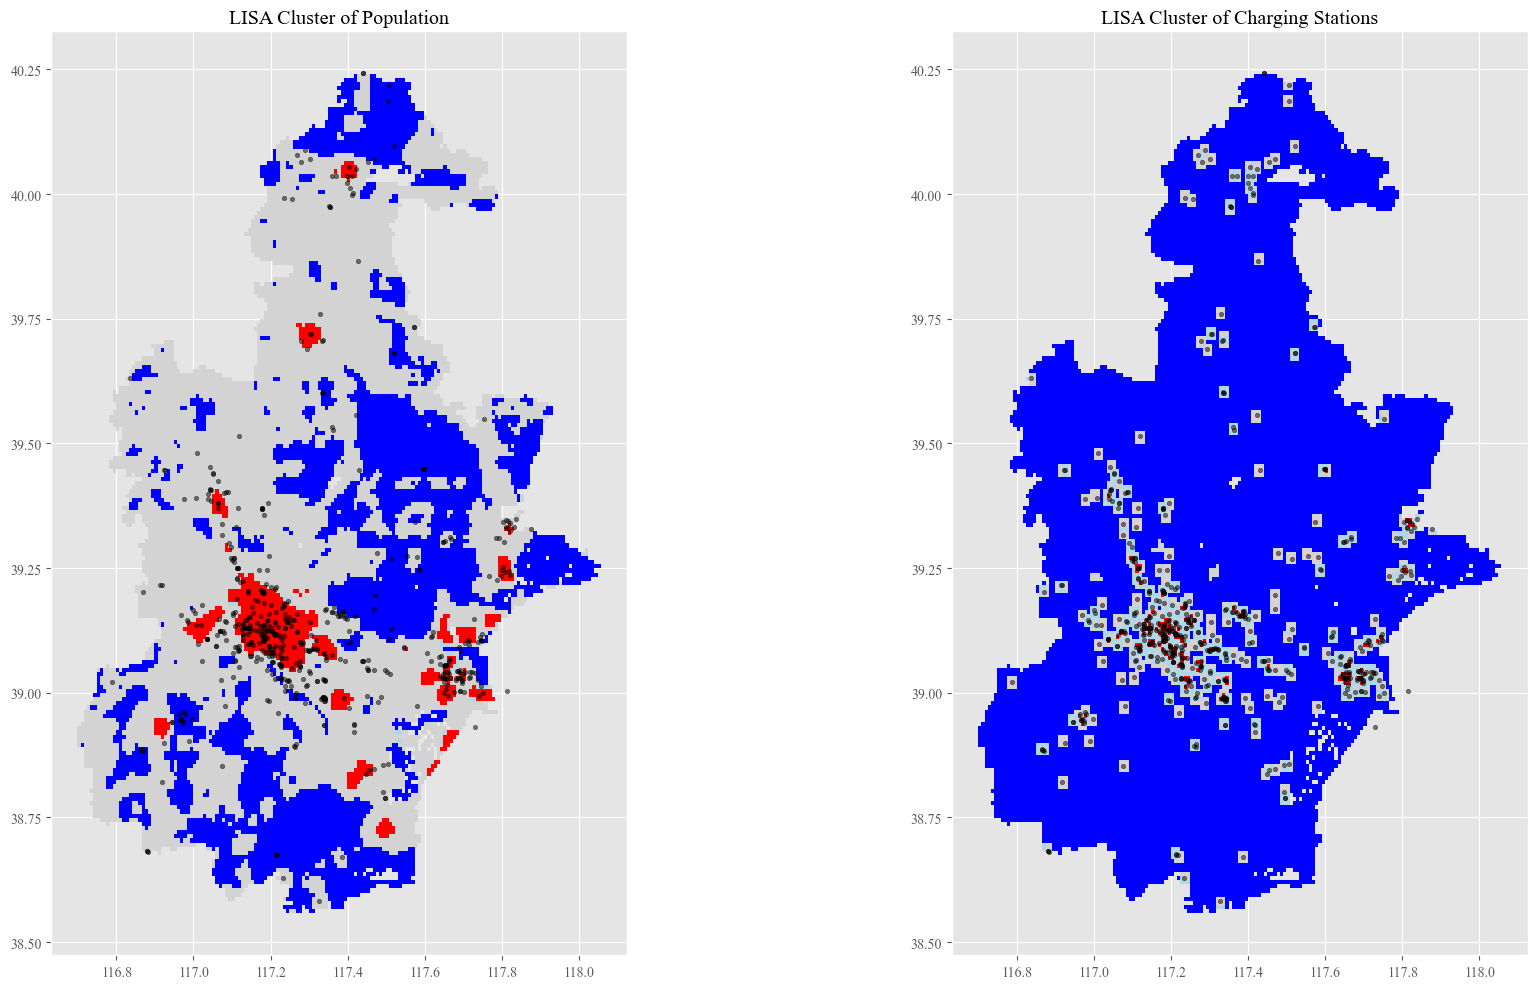

天津市:2020


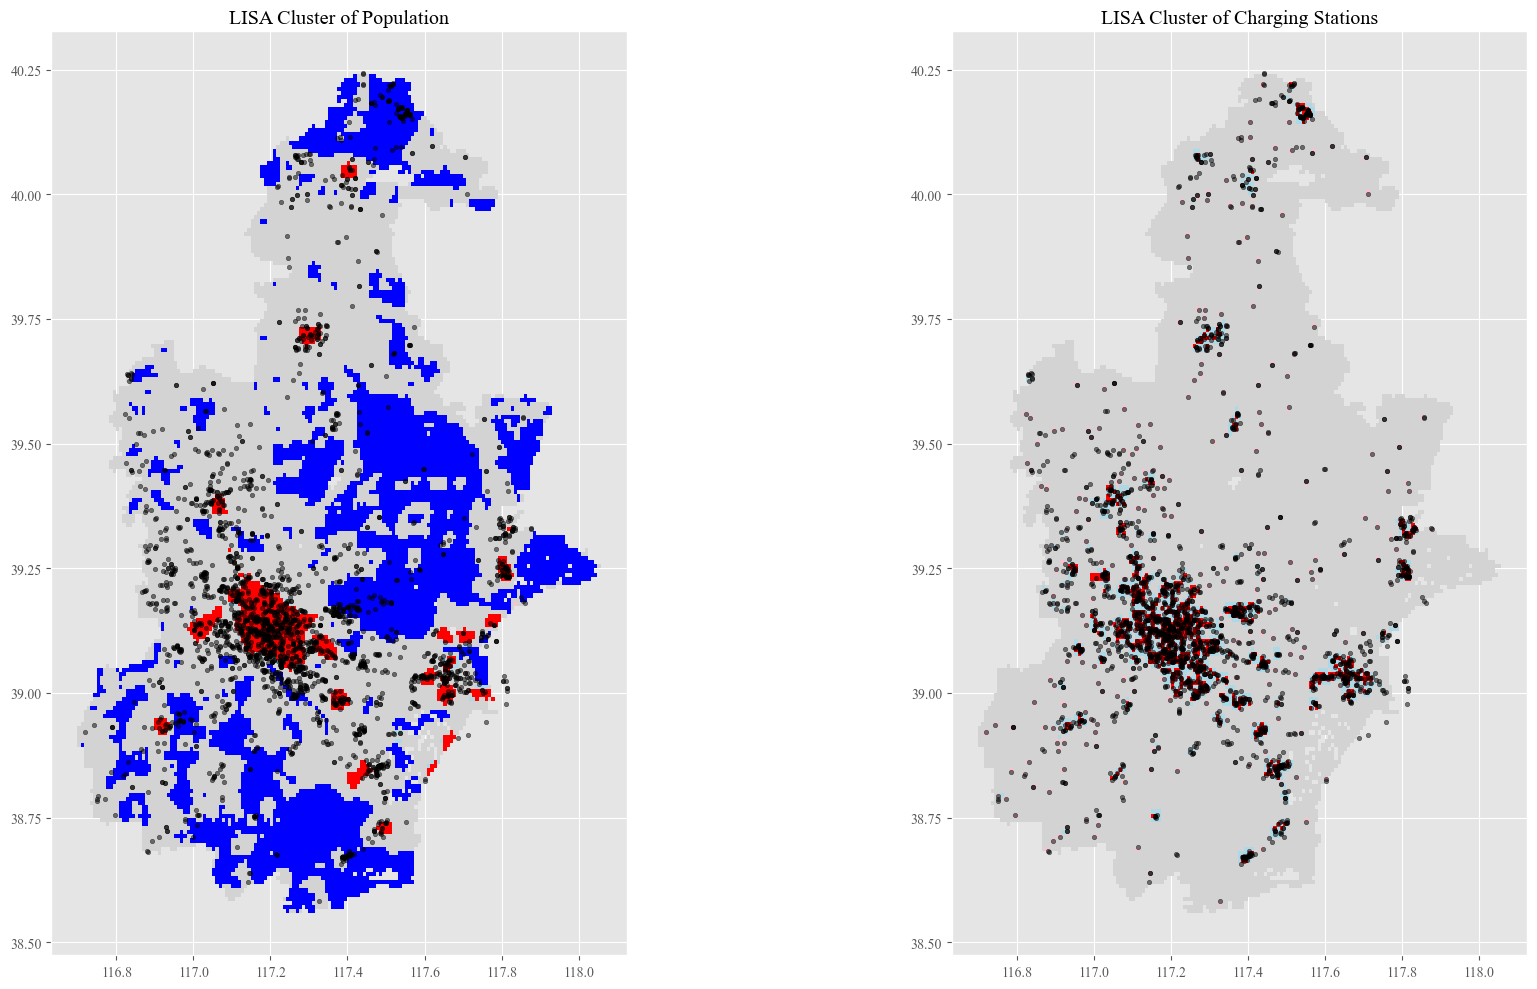

In [2]:
from DataProcess.densityAnalysis import densityAnalysis
evcs = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="Merge_Amap_15_25")
boundarys = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="CNMap_City")
gdp = pd.read_excel("China_Acc_Results/Result/city_gdponly.xlsx").set_index(u"区县")

densityAnalysis(RESULT, ("Relative_Accessibility", -0.02), evcs, (gdp, 15000), boundarys, r"C:\\0_PolyU\\cn_2015-2025_pop\\").cal()